# Data Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input/widsdatathon2023/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pandas'

In [62]:
train = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')
test = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')
sample_sol = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')

In [63]:
print(f'Shapes:\n {train.shape}, {test.shape}, {sample_sol.shape}')

Shapes:
 (375734, 246), (31354, 245), (31354, 2)


In [64]:
train.head()
test.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


## Handle Null

In [66]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)[:10]

nmme0-prate-34w__ccsm30    4.24
nmme0-tmp2m-34w__ccsm30    4.24
ccsm30                     4.24
nmme0-prate-56w__ccsm30    4.24
nmme-tmp2m-56w__ccsm3      2.74
nmme-prate-56w__ccsm3      2.74
nmme-tmp2m-34w__ccsm3      2.33
nmme-prate-34w__ccsm3      2.33
icec-2010-5                0.00
wind-hgt-500-2010-4        0.00
dtype: float64

In [67]:
round(test.isnull().sum()*100/len(train),2).sort_values(ascending=False)[:10]

index                   0.0
wind-hgt-850-2010-10    0.0
sst-2010-2              0.0
sst-2010-3              0.0
sst-2010-4              0.0
sst-2010-5              0.0
sst-2010-6              0.0
sst-2010-7              0.0
sst-2010-8              0.0
sst-2010-9              0.0
dtype: float64

In [68]:
train['nmme0-prate-34w__ccsm30'] = train['nmme0-prate-34w__ccsm30'].fillna(train['nmme0-prate-34w__ccsm30'].mean())
train['nmme0-tmp2m-34w__ccsm30'] = train['nmme0-tmp2m-34w__ccsm30'].fillna(train['nmme0-tmp2m-34w__ccsm30'].mean())
train['ccsm30'] = train['ccsm30'].fillna(train['ccsm30'].mean())
train['nmme0-prate-56w__ccsm30'] = train['nmme0-prate-56w__ccsm30'].fillna(train['nmme0-prate-56w__ccsm30'].mean())
train['nmme-tmp2m-56w__ccsm3'] = train['nmme-tmp2m-56w__ccsm3'].fillna(train['nmme-tmp2m-56w__ccsm3'].mean())
train['nmme-prate-56w__ccsm3'] = train['nmme-prate-56w__ccsm3'].fillna(train['nmme-prate-56w__ccsm3'].mean())
train['nmme-tmp2m-34w__ccsm3'] = train['nmme-tmp2m-34w__ccsm3'].fillna(train['nmme-tmp2m-34w__ccsm3'].mean())
train['nmme-prate-34w__ccsm3'] = train['nmme-prate-34w__ccsm3'].fillna(train['nmme-prate-34w__ccsm3'].mean())

## Feature Engineering

In [69]:
train['year']=pd.DatetimeIndex(train['startdate']).year 
train['month']=pd.DatetimeIndex(train['startdate']).month 
train['day']=pd.DatetimeIndex(train['startdate']).day
test['year']=pd.DatetimeIndex(test['startdate']).year 
test['month']=pd.DatetimeIndex(test['startdate']).month 
test['day']=pd.DatetimeIndex(test['startdate']).day

In [70]:
## remove the irrelevant columns
train=train.drop(['index'],axis=1)
train=train.drop(['startdate'],axis=1)
test=test.drop(['index'],axis=1)
test=test.drop(['startdate'],axis=1)

In [71]:
train["climateregions__climateregion"]=train["climateregions__climateregion"]=='BSh'
test["climateregions__climateregion"]=test["climateregions__climateregion"]=='BSh'
test["climateregions__climateregion"]

0         True
1         True
2         True
3         True
4         True
         ...  
31349    False
31350    False
31351    False
31352    False
31353    False
Name: climateregions__climateregion, Length: 31354, dtype: bool

In [72]:
train.describe()

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,...,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,year,month,day
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,11.694567,...,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334,2015.166895,6.519836,15.738714
std,0.251744,0.272059,198.085182,10.952417,11.073553,10.118011,10.574276,9.403434,10.689967,10.681607,...,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214,0.687627,3.449555,8.803932
min,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,-13.520000,...,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000,2014.000000,1.000000,1.000000
25%,0.409091,0.300000,104.062500,1.550000,3.650000,1.970000,3.080000,3.390000,2.970000,2.910000,...,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000,2015.000000,4.000000,8.000000
50%,0.590909,0.533333,250.320000,9.950000,11.890000,10.099323,11.600000,10.890000,11.280000,11.240000,...,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000,2015.000000,7.000000,16.000000
75%,0.818182,0.766667,420.010000,20.230000,22.110000,18.360000,20.360000,18.330000,20.300000,20.160000,...,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000,2016.000000,10.000000,23.000000
max,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,38.450000,...,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000,2016.000000,12.000000,31.000000


## Data Visualization

In [73]:
t1=train.loc[:, train.columns.str.startswith('nmme0-tmp2m-34w__c')]
t1.describe()

,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,10.801682,12.726739,10.099323,11.638229,10.733886
std,10.952417,11.073553,10.118011,10.574276,9.403434
min,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000
25%,1.550000,3.650000,1.970000,3.080000,3.390000
50%,9.950000,11.890000,10.099323,11.600000,10.890000
75%,20.230000,22.110000,18.360000,20.360000,18.330000
max,36.080000,36.030000,33.390000,34.640000,35.750000


# XGBoost

In [74]:
target="contest-tmp2m-14d__tmp2m"
y=train[target]
x=train.drop([target],axis=1)
# y_final = test[target]
x_final = test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [75]:
import xgboost as xgb
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[17:35:28] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14.91009	validation_1-rmse:14.88723
[100]	validation_0-rmse:6.03538	validation_1-rmse:6.02930
[200]	validation_0-rmse:3.04964	validation_1-rmse:3.05037
[300]	validation_0-rmse:2.12511	validation_1-rmse:2.12855
[400]	validation_0-rmse:1.81344	validation_1-rmse:1.81661
[499]	validation_0-rmse:1.67084	validation_1-rmse:1.67385


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

## Feature importance

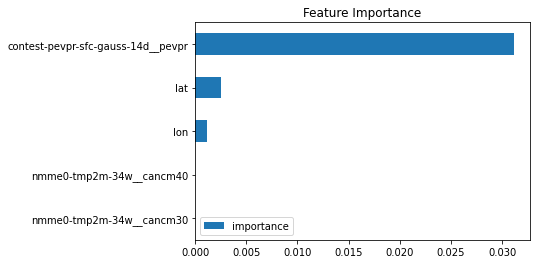

In [76]:
fi = pd.DataFrame(data=reg.feature_importances_[0:5],
             index=reg.feature_names_in_[0:5],
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Error

In [ ]:
# X_test['prediction'] = reg.predict(X_test.drop('prediction'))
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(y_test, X_test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

In [ ]:
X_test['error'] = np.abs(y_test - X_test['prediction'])
X_test['error'].sort_values(ascending=False).head(10)

In [ ]:
answer = reg.predict(x_final)
index = [i + 375734 for i in range (answer.shape[0])]

In [1]:
submit = pd.DataFrame(data={'index': index, 'contest-tmp2m-14d__tmp2m': answer})

NameError: name 'pd' is not defined

In [ ]:
submit.to_csv('naive_XGBoost.csv', index=False)